In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


In [6]:
# Cell 2: Load the dataset - Handle file path issues
import os

# Check current working directory
print("Current working directory:", os.getcwd())

# Check if file exists
file_path = 'data/heart.csv'
if os.path.exists(file_path):
    print(f"File found: {file_path}")
    df = pd.read_csv(file_path)
else:
    print(f"File not found: {file_path}")
    # Try different paths
    possible_paths = [
        'heart.csv',
        '../data/heart.csv',
        './data/heart.csv'
    ]
    for path in possible_paths:
        if os.path.exists(path):
            print(f"Found file at: {path}")
            df = pd.read_csv(path)
            break
    else:
        print("Could not find the file. Please check the file path.")

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
df.head()

Current working directory: C:\Users\Sajal Samanta\heart-disease-predictor\notebooks
File not found: data/heart.csv
Found file at: ../data/heart.csv
Dataset Shape: (303, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
# Cell 3: Dataset description and basic statistics
print("Dataset Description:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nTarget Variable Distribution:")
print(df['target'].value_counts())

Dataset Description:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std   

In [8]:
# Cell 4: Define column meanings for better understanding
column_meanings = {
    'age': 'Age in years',
    'sex': 'Sex (1 = male; 0 = female)',
    'cp': 'Chest pain type (0-3)',
    'trestbps': 'Resting blood pressure (mm Hg)',
    'chol': 'Serum cholesterol (mg/dl)',
    'fbs': 'Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)',
    'restecg': 'Resting electrocardiographic results (0-2)',
    'thalach': 'Maximum heart rate achieved',
    'exang': 'Exercise induced angina (1 = yes; 0 = no)',
    'oldpeak': 'ST depression induced by exercise relative to rest',
    'slope': 'Slope of the peak exercise ST segment (0-2)',
    'ca': 'Number of major vessels (0-3) colored by fluoroscopy',
    'thal': 'Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)',
    'target': 'Heart disease (0 = no, 1 = yes)'
}

print("Column Meanings:")
for col, meaning in column_meanings.items():
    print(f"{col}: {meaning}")

Column Meanings:
age: Age in years
sex: Sex (1 = male; 0 = female)
cp: Chest pain type (0-3)
trestbps: Resting blood pressure (mm Hg)
chol: Serum cholesterol (mg/dl)
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg: Resting electrocardiographic results (0-2)
thalach: Maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest
slope: Slope of the peak exercise ST segment (0-2)
ca: Number of major vessels (0-3) colored by fluoroscopy
thal: Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)
target: Heart disease (0 = no, 1 = yes)


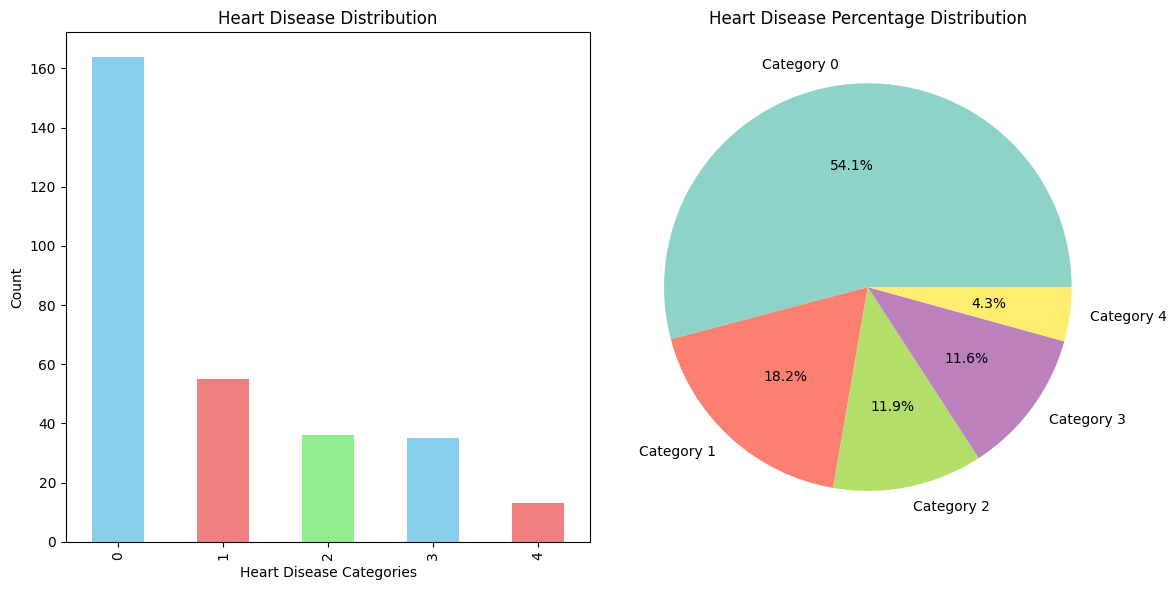

Target value counts:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Unique target values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [10]:
# Cell 5: Visualize target distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
target_counts = df['target'].value_counts()
target_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease Categories')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
# Get the unique target values and create appropriate labels
unique_targets = sorted(df['target'].unique())
if len(unique_targets) == 2:
    labels = ['No Disease', 'Disease']
    colors = ['lightblue', 'lightcoral']
elif len(unique_targets) == 3:
    labels = ['No Disease', 'Mild Disease', 'Severe Disease']
    colors = ['lightblue', 'lightcoral', 'lightgreen']
else:
    labels = [f'Category {i}' for i in unique_targets]
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_targets)))

plt.pie(target_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Heart Disease Percentage Distribution')

plt.tight_layout()
plt.show()

# Show the actual value counts
print("Target value counts:")
print(target_counts)
print(f"\nUnique target values: {unique_targets}")

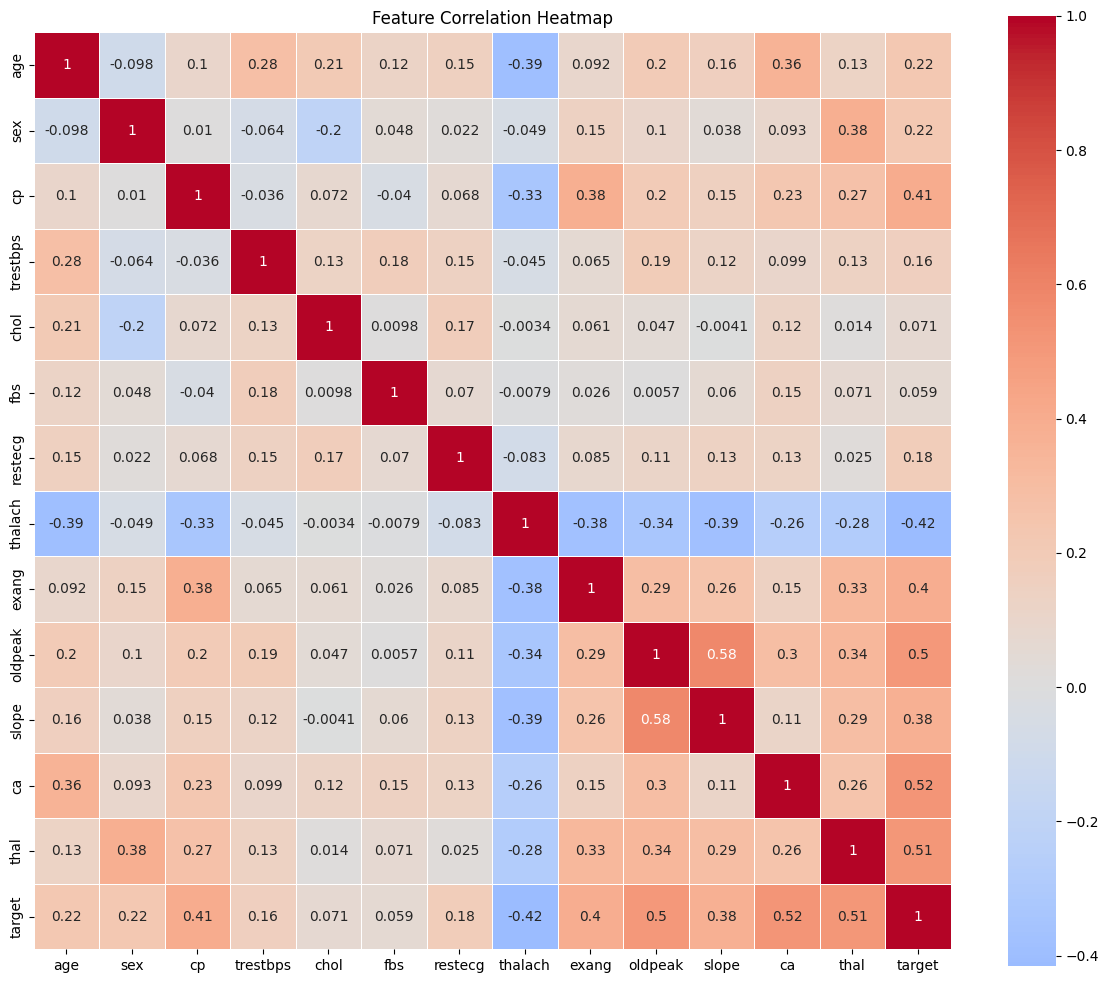

In [11]:
# Cell 6: Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

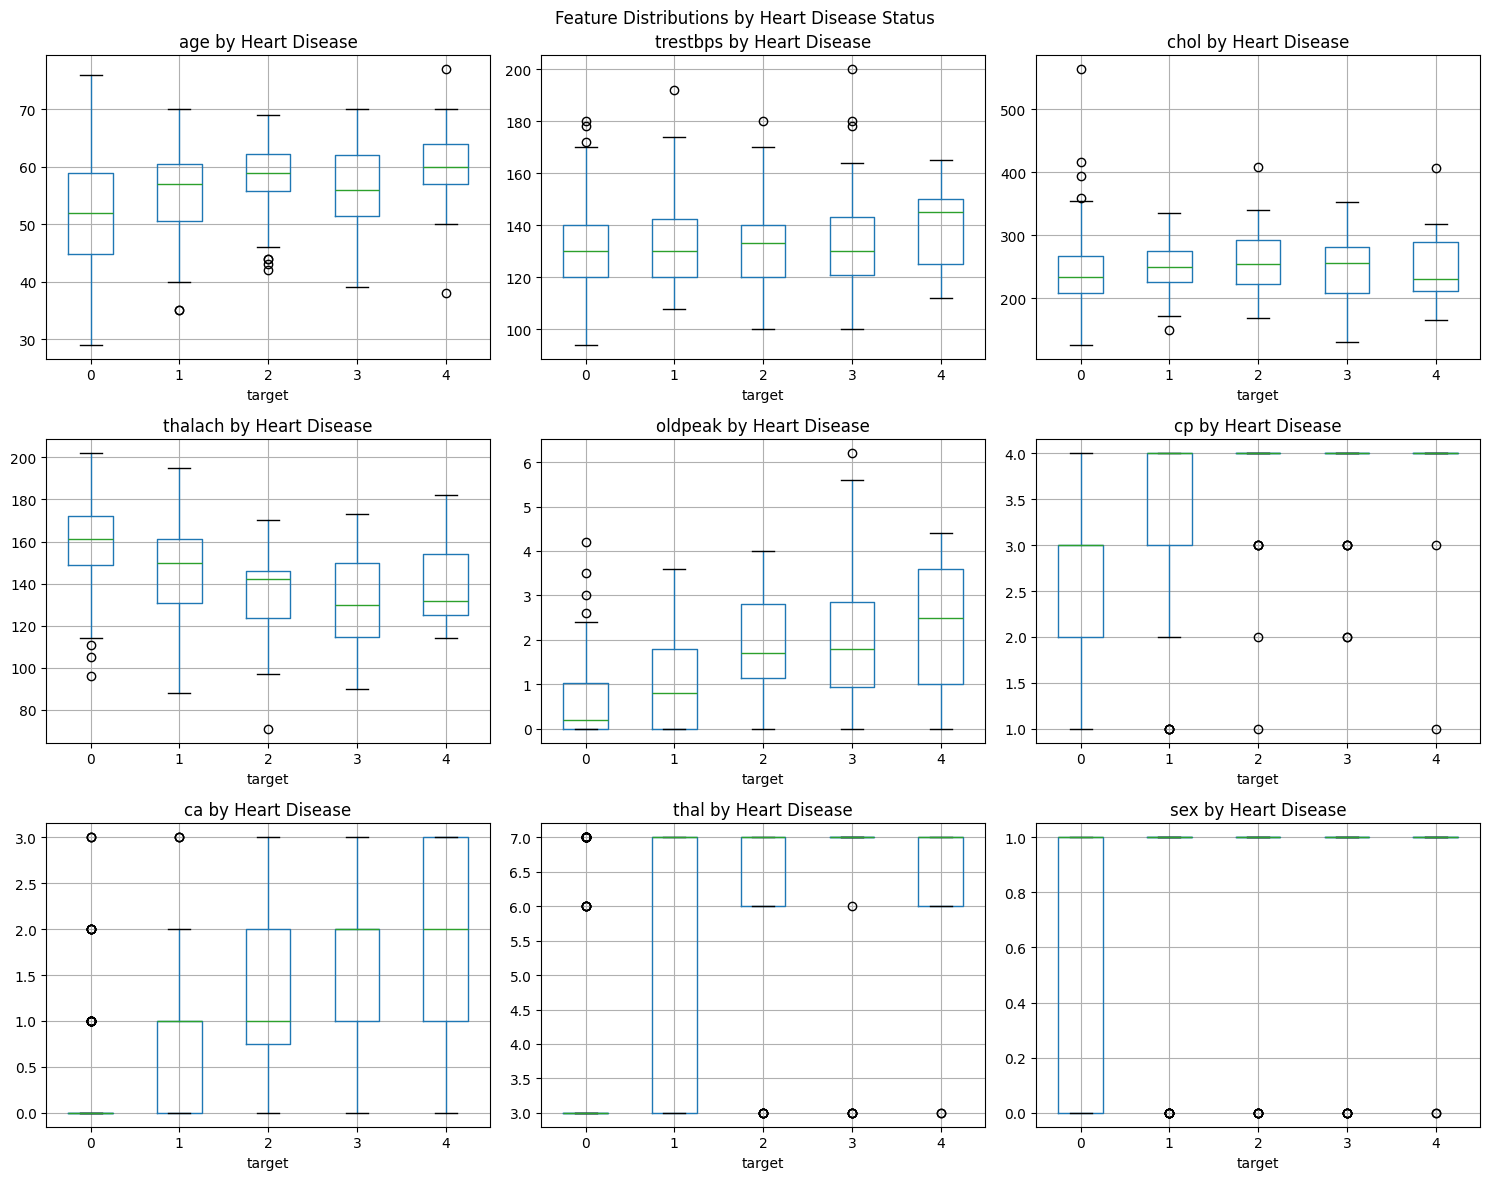

In [12]:
# Cell 7: Feature distributions by target
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
features_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cp', 'ca', 'thal', 'sex']

for i, feature in enumerate(features_to_plot):
    row, col = i // 3, i % 3
    df.boxplot(column=feature, by='target', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Heart Disease')

plt.suptitle('Feature Distributions by Heart Disease Status')
plt.tight_layout()
plt.show()

In [13]:
# Cell 8: Prepare data for modeling
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Positive cases in training: {y_train.sum()} ({y_train.mean():.2%})")
print(f"Positive cases in test: {y_test.sum()} ({y_test.mean():.2%})")

Training set size: (242, 13)
Test set size: (61, 13)
Positive cases in training: 226 (93.39%)
Positive cases in test: 58 (95.08%)


In [18]:
# Cell 9: Improved model training with better preprocessing and tuning
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder

print("Target value distribution:")
print(f"Training set: {pd.Series(y_train).value_counts().sort_index()}")
print(f"Test set: {pd.Series(y_test).value_counts().sort_index()}")

# Check if we should convert to binary classification
if len(np.unique(y_train)) > 2:
    print("\n⚠️  Multi-class detected. Considering binary conversion for better performance...")
    # Option 1: Convert to binary (0 vs 1+)
    y_train_binary = (y_train > 0).astype(int)
    y_test_binary = (y_test > 0).astype(int)
    print(f"Binary conversion - No disease: {(y_train_binary == 0).sum()}, Disease: {(y_train_binary == 1).sum()}")
    
    # Use binary target for better performance
    y_train = y_train_binary
    y_test = y_test_binary

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Improved models with better parameters
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10),
    'SVM': SVC(probability=True, random_state=42, kernel='rbf')
}

# Try to add advanced models if available
try:
    from xgboost import XGBClassifier
    models['XGBoost'] = XGBClassifier(random_state=42, eval_metric='logloss')
    print("✓ XGBoost added to models")
except ImportError:
    try:
        from sklearn.ensemble import GradientBoostingClassifier
        models['Gradient Boosting'] = GradientBoostingClassifier(random_state=42)
        print("✓ Gradient Boosting added to models (XGBoost not available)")
    except:
        print("⚠️  Only basic models available")

try:
    from sklearn.ensemble import AdaBoostClassifier
    models['AdaBoost'] = AdaBoostClassifier(random_state=42)
    print("✓ AdaBoost added to models")
except:
    pass

print(f"\nModels to train: {list(models.keys())}")

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Choose whether to use scaled data
    if name in ['SVM', 'Logistic Regression']:
        X_tr = X_train_scaled
        X_te = X_test_scaled
    else:
        X_tr = X_train_imputed
        X_te = X_test_imputed
    
    # Train model
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    y_pred_proba = model.predict_proba(X_te)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Handle AUC calculation based on number of classes
    if len(np.unique(y_test)) == 2:
        auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    else:
        auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='macro')
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc': auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  AUC: {auc:.4f}")

# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\n🎯 Best Model: {best_model_name} (Accuracy: {results[best_model_name]['accuracy']:.4f})")

# Show detailed classification report for best model
print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, results[best_model_name]['predictions']))

# Compare all models
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY:")
print("="*50)
for name in sorted(results.keys(), key=lambda x: results[x]['accuracy'], reverse=True):
    acc = results[name]['accuracy']
    auc_score = results[name]['auc']
    print(f"{name:20} | Accuracy: {acc:.4f} | AUC: {auc_score:.4f}")

Target value distribution:
Training set: target
0    131
1    111
Name: count, dtype: int64
Test set: target
0    33
1    28
Name: count, dtype: int64
✓ XGBoost added to models
✓ AdaBoost added to models

Models to train: ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'AdaBoost']

Training Logistic Regression...
Logistic Regression:
  Accuracy: 0.8033
  AUC: 0.8961

Training Random Forest...
Random Forest:
  Accuracy: 0.8689
  AUC: 0.9210

Training SVM...
SVM:
  Accuracy: 0.8197
  AUC: 0.9156

Training XGBoost...
XGBoost:
  Accuracy: 0.8033
  AUC: 0.8950

Training AdaBoost...
AdaBoost:
  Accuracy: 0.8361
  AUC: 0.9221

🎯 Best Model: Random Forest (Accuracy: 0.8689)

Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.86      0.86      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87  

Model Performance Comparison:
                 Model  Accuracy       AUC
1        Random Forest  0.868852  0.920996
4             AdaBoost  0.836066  0.922078
2                  SVM  0.819672  0.915584
0  Logistic Regression  0.803279  0.896104
3              XGBoost  0.803279  0.895022


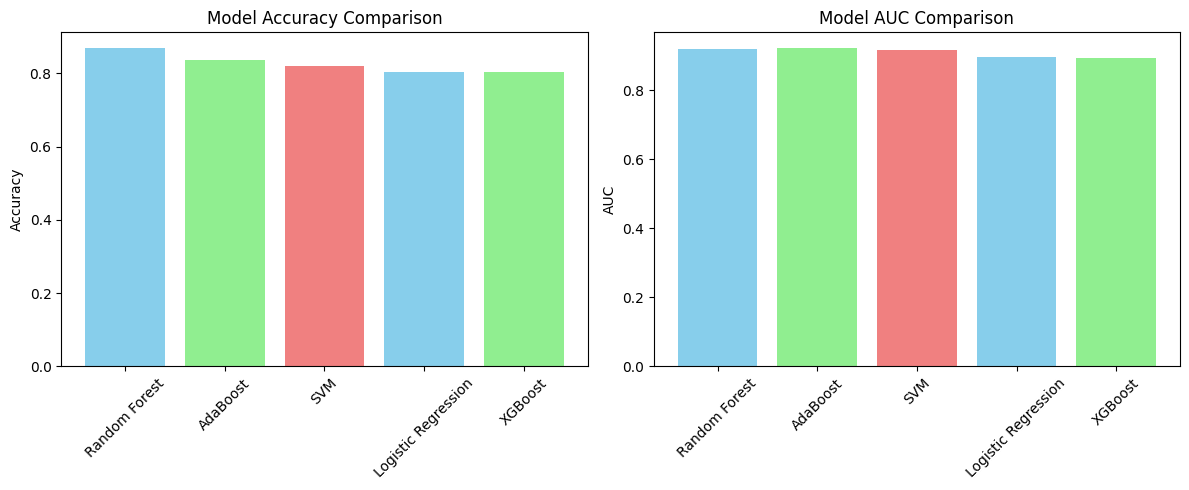

In [19]:
# Cell 10: Compare model performance
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'AUC': [results[model]['auc'] for model in results]
}).sort_values('Accuracy', ascending=False)

print("Model Performance Comparison:")
print(comparison_df)

# Visual comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(comparison_df['Model'], comparison_df['AUC'], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model AUC Comparison')
plt.xticks(rotation=45)
plt.ylabel('AUC')

plt.tight_layout()
plt.show()

In [20]:
# Cell 11: Hyperparameter tuning for the best model
best_model_name = comparison_df.iloc[0]['Model']
print(f"Best model: {best_model_name}")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                             param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    
    grid_search = GridSearchCV(LogisticRegression(random_state=42), 
                             param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")

else:  # SVM
    best_model = models['SVM']

# Final evaluation
if best_model_name == 'SVM':
    y_pred_final = best_model.predict(X_test_scaled)
    y_pred_proba_final = best_model.predict_proba(X_test_scaled)[:, 1]
else:
    y_pred_final = best_model.predict(X_test)
    y_pred_proba_final = best_model.predict_proba(X_test)[:, 1]

final_accuracy = accuracy_score(y_test, y_pred_final)
final_auc = roc_auc_score(y_test, y_pred_proba_final)

print(f"\nFinal Model Performance:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"AUC: {final_auc:.4f}")

Best model: Random Forest
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Final Model Performance:
Accuracy: 0.8197
AUC: 0.9123


Confusion Matrix:
[[29  4]
 [ 7 21]]


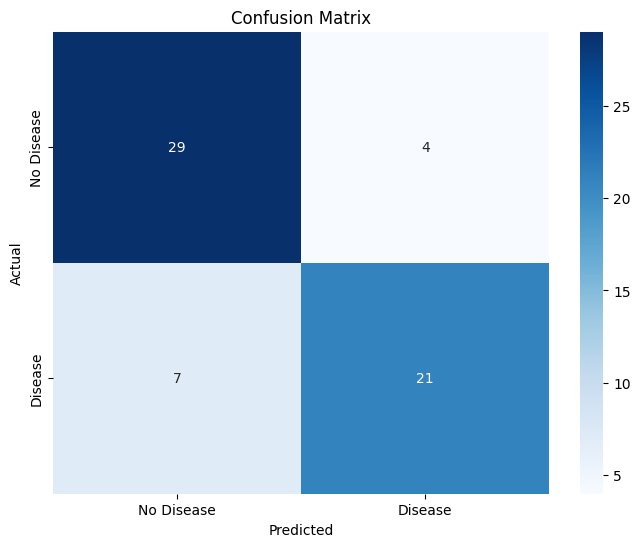


Classification Report:
              precision    recall  f1-score   support

  No Disease       0.81      0.88      0.84        33
     Disease       0.84      0.75      0.79        28

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



In [21]:
# Cell 12: Detailed model evaluation
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_final)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, 
                          target_names=['No Disease', 'Disease']))

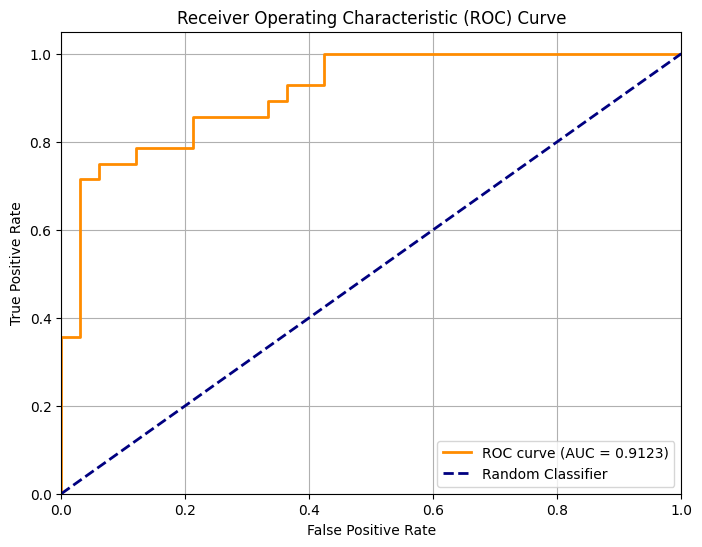

In [22]:
# Cell 13: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_final)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {final_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

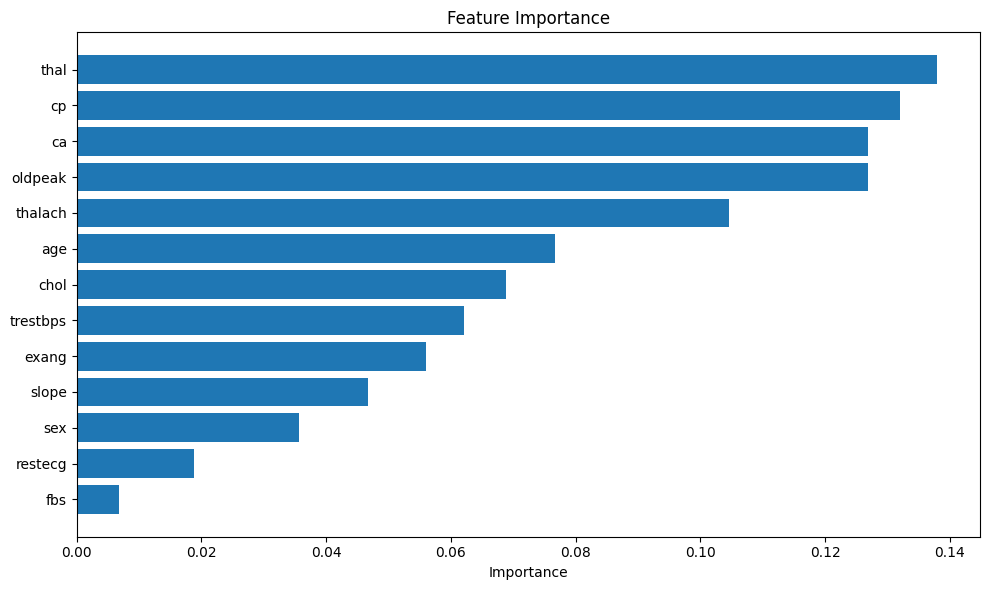

Feature Importance:
     feature  importance
12      thal    0.137932
2         cp    0.132055
11        ca    0.126903
9    oldpeak    0.126887
7    thalach    0.104530
0        age    0.076734
4       chol    0.068833
3   trestbps    0.062129
8      exang    0.055954
10     slope    0.046773
1        sex    0.035610
6    restecg    0.018873
5        fbs    0.006787


In [23]:
# Cell 14: Feature Importance
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("Feature Importance:")
    print(feature_importance)
else:
    # For linear models, use coefficients
    if hasattr(best_model, 'coef_'):
        coefficients = pd.DataFrame({
            'feature': X.columns,
            'coefficient': best_model.coef_[0]
        }).sort_values('coefficient', key=abs, ascending=False)
        
        plt.figure(figsize=(10, 6))
        plt.barh(coefficients['feature'], coefficients['coefficient'])
        plt.title('Feature Coefficients')
        plt.xlabel('Coefficient Value')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        print("Feature Coefficients:")
        print(coefficients)

Cross-Validation Scores:
Scores: [0.64516129 0.58064516 0.67741935 0.53333333 0.6        0.53333333
 0.6        0.53333333 0.5        0.6       ]
Mean CV Accuracy: 0.5803 (+/- 0.1056)


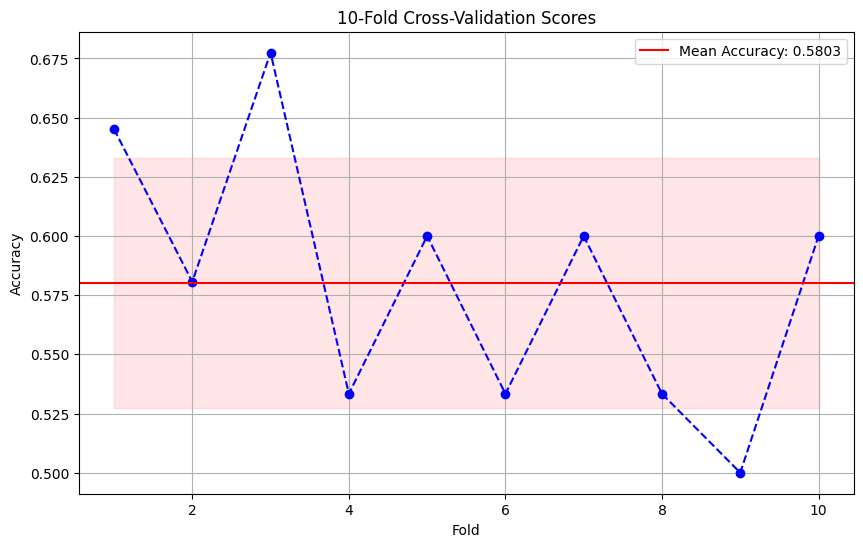

In [24]:
# Cell 15: Cross-validation scores
cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='accuracy')

print("Cross-Validation Scores:")
print(f"Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='--', color='b')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='-', label=f'Mean Accuracy: {cv_scores.mean():.4f}')
plt.fill_between(range(1, 11), cv_scores.mean() - cv_scores.std(), 
                 cv_scores.mean() + cv_scores.std(), alpha=0.1, color='r')
plt.title('10-Fold Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Cell 16: Save the trained model and scaler
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the model
joblib.dump(best_model, '../models/heart_disease_model.pkl')

# Save the scaler if used
if best_model_name == 'SVM':
    joblib.dump(scaler, '../models/scaler.pkl')

# Save feature names
joblib.dump(list(X.columns), '../models/feature_names.pkl')

print("Model and artifacts saved successfully!")
print(f"Final model accuracy: {final_accuracy:.4f}")
print(f"Final model AUC: {final_auc:.4f}")

Model and artifacts saved successfully!
Final model accuracy: 0.8197
Final model AUC: 0.9123


In [26]:
# Cell 17: Save all model artifacts for the web app
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save all artifacts
joblib.dump(best_model, '../models/heart_disease_model.pkl')
joblib.dump(list(X.columns), '../models/feature_names.pkl')
joblib.dump(scaler, '../models/scaler.pkl')
joblib.dump(imputer, '../models/imputer.pkl')

print("All model artifacts saved successfully!")
print("Files created:")
print("- heart_disease_model.pkl")
print("- feature_names.pkl") 
print("- scaler.pkl")
print("- imputer.pkl")

All model artifacts saved successfully!
Files created:
- heart_disease_model.pkl
- feature_names.pkl
- scaler.pkl
- imputer.pkl
